# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft, fftfreq
import pywt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix , classification_report

# Importing Dataset

In [17]:
emotions_eeg = pd.read_csv("new_emotions.csv")

# Making Dataframe from_all Signals

In [49]:
dataset= emotions_eeg.iloc[:,1:750]
labels=emotions_eeg.iloc[:,750]
dataset['label']=labels

# Didplaying Dataset With Corresponding Labels 

In [50]:
dataset

,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,fft_10_b,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,438.00,-222.00,-222.00,438.00,143.0,59.40,5.05,5.05,59.40,-159.0,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,-4.00,7.42,7.42,-4.00,81.6,-22.30,35.30,35.30,-22.30,178.0,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,361.00,-62.20,-62.20,361.00,-558.0,684.00,-152.00,-152.00,684.00,-312.0,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,3.89,12.10,12.10,3.89,-188.0,274.00,-200.00,-200.00,274.00,258.0,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,-27.40,147.00,147.00,-27.40,301.0,-8.48,138.00,138.00,-8.48,349.0,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,3.37,29.20,29.20,3.37,151.0,-19.40,8.89,8.89,-19.40,124.0,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,202.00,-81.60,-81.60,202.00,-345.0,404.00,-205.00,-205.00,404.00,-123.0,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,312.00,-259.00,-259.00,312.00,-186.0,276.00,-199.00,-199.00,276.00,342.0,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,2.48,49.00,49.00,2.48,-230.0,216.00,-92.40,-92.40,216.00,-879.0,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [94]:
i=2
sample1=dataset.iloc[i,dataset.columns != 'label']

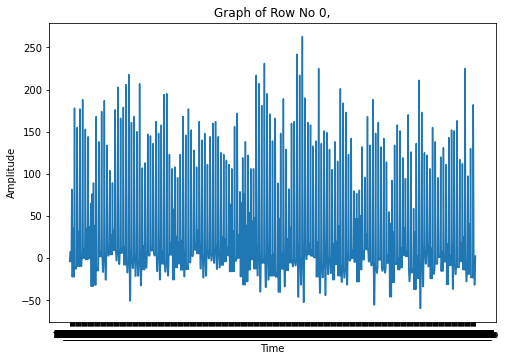

In [74]:
plt.figure(1)
plt.plot(sample1)
plt.title('Graph of Row No 0,')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Ploting FFT of a Signal

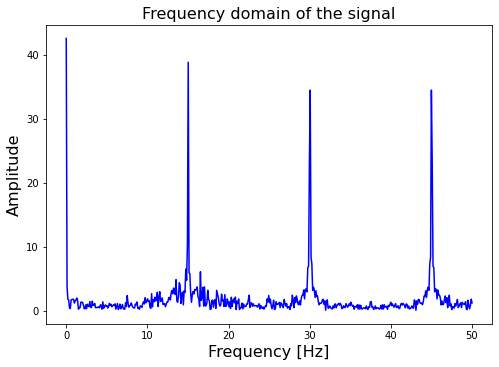

In [75]:
from scipy.fftpack import fft
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
f_values, fft_values = get_fft_values(sample1, T, N, f_s)
 
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

In [76]:
dataset['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [77]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [78]:
def preprocess_inputs(df):
    df=df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y=df['label'].copy()
    x=df.drop('label',axis=1).copy()
    
    x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.7, random_state=123)
    
    return x_train, x_test, y_train, y_test

In [79]:
x_train, x_test, y_train, y_test = preprocess_inputs(dataset)

In [80]:
y_train

993     2
1851    2
1253    0
1228    1
1461    1
       ..
1593    2
1147    1
1766    0
1122    1
1346    0
Name: label, Length: 1492, dtype: int64

# CWT Implementation

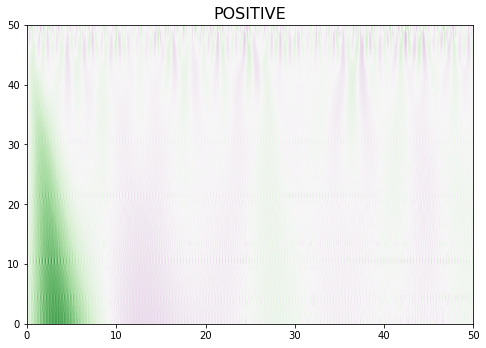

In [95]:
widths = np.arange(1, 51)
cwtmatr, freqs = pywt.cwt(sample1, widths, 'mexh')
plt.imshow(cwtmatr, extent=[0, 50, 0, 50], cmap='PRGn', aspect='auto',
vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.title(labels[i], fontsize=16)
plt.show() 

In [98]:
x_test

,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,fft_10_b,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
1676,396.00,-154.0,-154.0,396.00,-122.0,239.00,-14.7,-14.7,239.00,-235.0,...,6.27,152.00,-93.6,-93.6,152.00,56.20,103.00,-64.20,-64.20,103.00
1074,262.00,-175.0,-175.0,262.00,-70.4,238.00,-98.8,-98.8,238.00,203.0,...,-139.00,213.00,-118.0,-118.0,213.00,-4.39,75.60,59.00,59.00,75.60
1451,-21.30,-36.2,-36.2,-21.30,71.1,-8.47,-26.9,-26.9,-8.47,121.0,...,75.50,-10.70,-25.6,-25.6,-10.70,175.00,6.03,8.52,8.52,6.03
1134,-9.89,22.2,22.2,-9.89,151.0,7.63,9.8,9.8,7.63,85.2,...,138.00,25.80,12.8,12.8,25.80,125.00,3.00,26.10,26.10,3.00
912,142.00,-48.2,-48.2,142.00,-739.0,549.00,-323.0,-323.0,549.00,-496.0,...,-881.00,612.00,-310.0,-310.0,612.00,-607.00,534.00,-235.00,-235.00,534.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,-8.70,36.8,36.8,-8.70,23.2,-44.60,-16.9,-16.9,-44.60,112.0,...,81.80,-17.90,-66.9,-66.9,-17.90,65.20,11.30,2.53,2.53,11.30
1016,-117.00,14.2,14.2,-117.00,-568.0,482.00,-215.0,-215.0,482.00,101.0,...,-487.00,446.00,-206.0,-206.0,446.00,87.90,106.00,-129.00,-129.00,106.00
1209,177.00,-95.0,-95.0,177.00,-842.0,585.00,-346.0,-346.0,585.00,-842.0,...,-670.00,513.00,-267.0,-267.0,513.00,-642.00,608.00,-291.00,-291.00,608.00
36,166.00,-94.1,-94.1,166.00,252.0,-106.00,72.2,72.2,-106.00,46.0,...,111.00,-54.60,64.1,64.1,-54.60,73.10,41.50,-107.00,-107.00,41.50


In [99]:
label_df = dataset['label']
dataset.drop('label', axis = 1, inplace=True)

In [100]:
correlations = dataset.corr(method='pearson')
correlations

,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,fft_10_b,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
fft_1_b,1.000000,-0.876557,-0.876557,1.000000,-0.416398,0.498501,-0.367296,-0.367296,0.498501,-0.452929,...,-0.408890,0.475166,-0.333603,-0.333603,0.475166,-0.413121,0.454465,-0.334815,-0.334815,0.454465
fft_2_b,-0.876557,1.000000,1.000000,-0.876557,0.407725,-0.425948,0.481940,0.481940,-0.425948,0.340327,...,0.360549,-0.417590,0.321492,0.321492,-0.417590,0.293997,-0.325663,0.264721,0.264721,-0.325663
fft_3_b,-0.876557,1.000000,1.000000,-0.876557,0.407725,-0.425948,0.481940,0.481940,-0.425948,0.340327,...,0.360549,-0.417590,0.321492,0.321492,-0.417590,0.293997,-0.325663,0.264721,0.264721,-0.325663
fft_4_b,1.000000,-0.876557,-0.876557,1.000000,-0.416398,0.498501,-0.367296,-0.367296,0.498501,-0.452929,...,-0.408890,0.475166,-0.333603,-0.333603,0.475166,-0.413121,0.454465,-0.334815,-0.334815,0.454465
fft_5_b,-0.416398,0.407725,0.407725,-0.416398,1.000000,-0.937872,0.845393,0.845393,-0.937872,0.458701,...,0.813301,-0.820372,0.714146,0.714146,-0.820372,0.350699,-0.430295,0.252874,0.252874,-0.430295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fft_745_b,-0.413121,0.293997,0.293997,-0.413121,0.350699,-0.382383,0.289672,0.289672,-0.382383,0.820630,...,0.458558,-0.431711,0.415781,0.415781,-0.431711,1.000000,-0.938696,0.834622,0.834622,-0.938696
fft_746_b,0.454465,-0.325663,-0.325663,0.454465,-0.430295,0.457297,-0.369929,-0.369929,0.457297,-0.829208,...,-0.493145,0.531019,-0.459876,-0.459876,0.531019,-0.938696,1.000000,-0.815108,-0.815108,1.000000
fft_747_b,-0.334815,0.264721,0.264721,-0.334815,0.252874,-0.278506,0.193019,0.193019,-0.278506,0.696402,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108
fft_748_b,-0.334815,0.264721,0.264721,-0.334815,0.252874,-0.278506,0.193019,0.193019,-0.278506,0.696402,...,0.375438,-0.355117,0.499272,0.499272,-0.355117,0.834622,-0.815108,1.000000,1.000000,-0.815108


In [102]:
skew = dataset.skew(axis=1)
skew

0       0.035750
1       1.448366
2       0.158358
3       0.098304
4       0.890452
          ...   
2127    1.442488
2128    0.076627
2129    0.149538
2130    0.003647
2131    1.351089
Length: 2132, dtype: float64

# PCA(Principal Component Analysis)

In [111]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataset)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.5313074792517972
Explained Variance ratio by Principal Component  2  :  0.1538126667069402
Explained Variance ratio by Principal Component  3  :  0.13815499493381428
Explained Variance ratio by Principal Component  4  :  0.025533337303402754
Explained Variance ratio by Principal Component  5  :  0.018136478662969895
Explained Variance ratio by Principal Component  6  :  0.011497225200287875
Explained Variance ratio by Principal Component  7  :  0.008336264713824655
Explained Variance ratio by Principal Component  8  :  0.00662869886272575
Explained Variance ratio by Principal Component  9  :  0.005646875323951055
Explained Variance ratio by Principal Component  10  :  0.005514058378495658
Explained Variance ratio by Principal Component  11  :  0.005151476068591117
Explained Variance ratio by Principal Component  12  :  0.004509429200399229
Explained Variance ratio by Principal Component  13  :  0.004217129413725742
Explained Vari

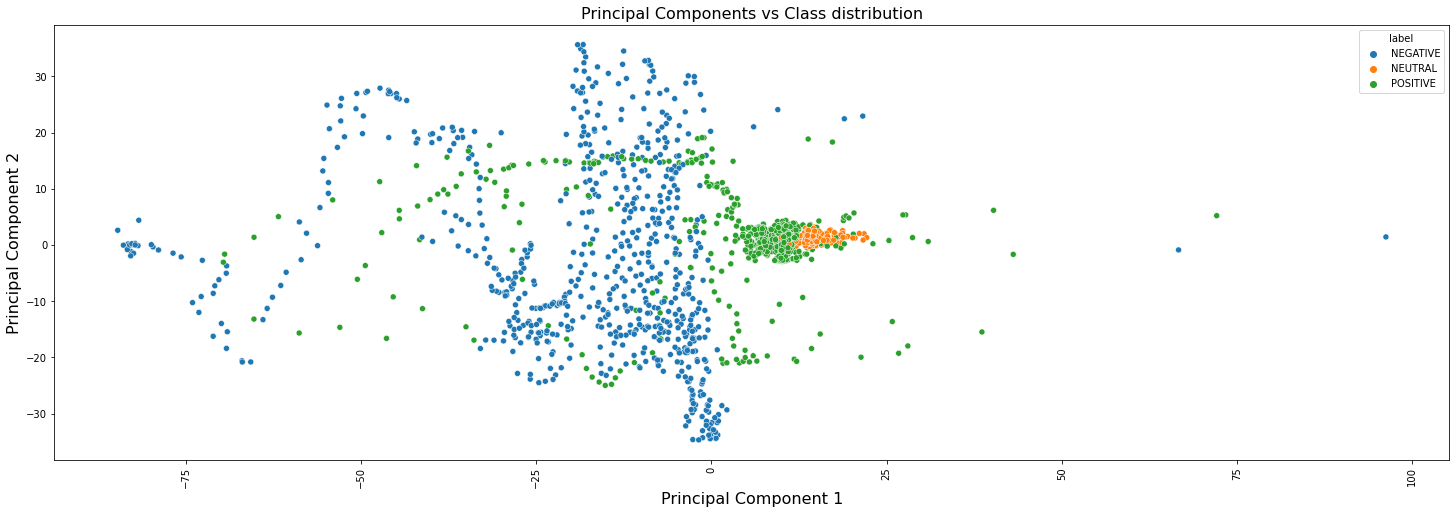

In [112]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

# Logistic Regression 

In [114]:
%%time
pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=4000))])
scores = cross_val_score(pl_log_reg_pca, x_train, y_train, cv=10,scoring='accuracy')
pl_log_reg_pca.fit(x_train, y_train)
pred_pl_logistic_regression= pl_log_reg_pca.predict(x_test)
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

Accuracy for Logistic Regression with 2 Principal Components:  0.8766711409395974
Wall time: 8.96 s


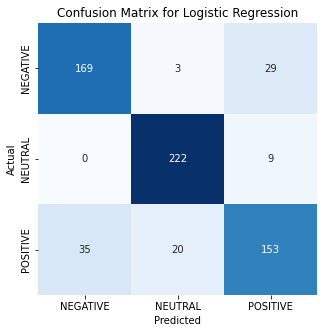

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.83      0.84      0.83       201
     NEUTRAL       0.91      0.96      0.93       231
    POSITIVE       0.80      0.74      0.77       208

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.84       640
weighted avg       0.85      0.85      0.85       640



In [116]:
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_pl_logistic_regression)))

cm = confusion_matrix(y_test, pred_pl_logistic_regression)
clr = classification_report(y_test,pred_pl_logistic_regression, target_names=label_mapping.keys())

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# Random Forest

In [30]:
%%time

pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, x_train, y_train, cv=10,scoring='accuracy')
pl_random_forest.fit(x_train, y_train)
pred_pl_random_forest= pl_random_forest.predict(x_test)
print('Accuracy for RandomForest : ', scores.mean())

Accuracy for RandomForest :  0.9316465324384788
Wall time: 49.6 s


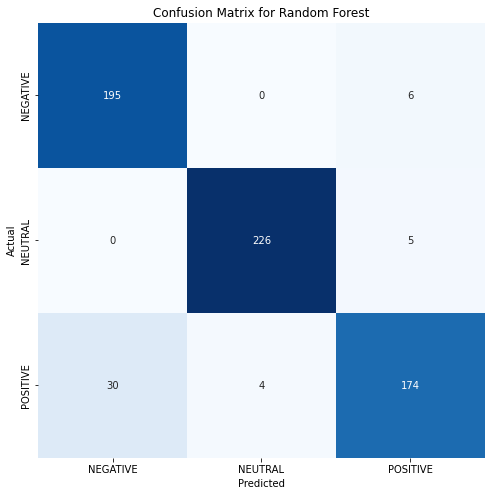

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.87      0.97      0.92       201
     NEUTRAL       0.98      0.98      0.98       231
    POSITIVE       0.94      0.84      0.89       208

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



In [31]:
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_pl_random_forest)))

cm = confusion_matrix(y_test, pred_pl_random_forest)
clr = classification_report(y_test, pred_pl_random_forest, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# ANN(Artificial Neural Network)

In [32]:
%%time

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, x_train, y_train, cv=10,scoring='accuracy')
pl_mlp.fit(x_train, y_train)
pred_mlp= pl_mlp.predict(x_test)
print('Accuracy for ANN : ', scores.mean())

Accuracy for ANN :  0.9644742729306488
Wall time: 17min 35s


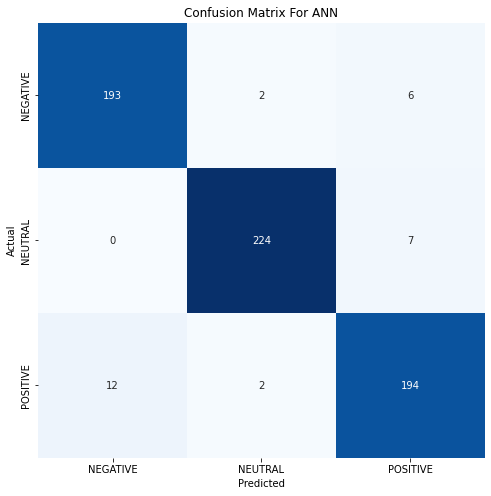

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.94      0.96      0.95       201
     NEUTRAL       0.98      0.97      0.98       231
    POSITIVE       0.94      0.93      0.93       208

    accuracy                           0.95       640
   macro avg       0.95      0.95      0.95       640
weighted avg       0.95      0.95      0.95       640



In [33]:
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_mlp)))

cm = confusion_matrix(y_test, pred_mlp)
clr = classification_report(y_test, pred_mlp, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For ANN")
plt.show()

print("Classification Report:\n----------------------\n", clr)

# SVM(Support Vector Machine)

In [34]:
%%time

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', SVC())])
scores = cross_val_score(pl_svm, x_train, y_train, cv=10,scoring='accuracy')
pl_svm.fit(x_train, y_train)
pred_svm= pl_svm.predict(x_test)
print('Accuracy for Linear SVM : ', scores.mean())

Accuracy for Linear SVM :  0.9370201342281879
Wall time: 9.44 s


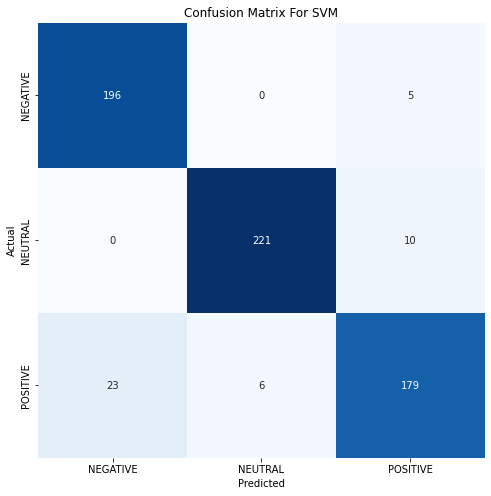

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.89      0.98      0.93       201
     NEUTRAL       0.97      0.96      0.97       231
    POSITIVE       0.92      0.86      0.89       208

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



In [35]:
from sklearn.metrics import confusion_matrix  
_pred = np.array(list(map(lambda x: np.argmax(x), pred_svm)))

cm = confusion_matrix(y_test, pred_svm)
clr = classification_report(y_test, pred_svm, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix For SVM")
plt.show()

print("Classification Report:\n----------------------\n", clr)